This notebook is divided into the below sections:

1. Problem Stement
2. Importing libraries
3. Data Reading and basic understanding
4. Data Cleaning
    -removing outliers
    -renaming columns
5. Univariate and Multivariate Analysis
    - study correlation for understanding linear regression fit
6. Data Preparation for linear regression
    - Min Max Scaling
    - Categorical to numeric values conversion
7. Linear Regression model building
    - RFE, MFE
    - VIF and P values boundaries
8. Residual Analysis and Prediction
9. Evaluation of the model on test dataset
10. Linear regression charateristics and model Explaination

## Step 1 -  Problem Statement

PROBLEM STATEMENT: To understand the factors affecting the demand for these shared bikes in the American market. A US bike-sharing provider BoomBikes  wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands


day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

## Step 2 -  Importing libraries

In [366]:

import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score, mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import scipy.stats as stats

## Step 3-  Data reading

In [367]:
#reading the dataset into pandas dataframe
bike=pd.read_csv("day.csv",  low_memory=False)
bike.shape


(730, 16)

In [368]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [369]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [370]:
bike.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


## Step 4- Data Cleaning

### Visualizing null values before data cleaning

<AxesSubplot:>

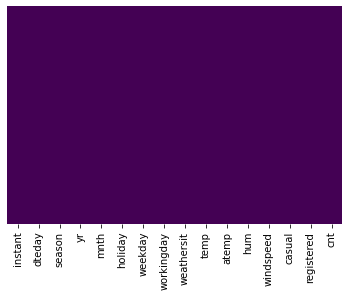

In [371]:
sns.heatmap(bike.isnull(),yticklabels=False,cbar=False, cmap="viridis")

In [372]:
#check how many columns with null records
nullcount=bike.isna().sum()
nullcount

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### removing columns with all distinct values

In [373]:
alldistinctvalues=[]
for index,value in bike.nunique().items():
    if value == len(bike):
        alldistinctvalues.append(index)
print(alldistinctvalues)


['instant', 'dteday']


In [374]:
bikedata=bike.drop(axis=1,  columns=alldistinctvalues)

### removing user beahviour columns as this wont impact our analysis and it is included in target variable

In [375]:
bikedata=bikedata.drop(axis=1,  columns=["casual","registered"])

### by definietion, working day is redundant as the information is covered in weekday and holiday

In [376]:
bikedata=bikedata.drop(axis=1,  columns=["workingday"])

In [377]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   weathersit  730 non-null    int64  
 6   temp        730 non-null    float64
 7   atemp       730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 62.9 KB


In [378]:
print(bikedata.shape)
print("There are a total of", bikedata.shape[0] ,"rows and ",bikedata.shape[1]," coloumns")

(730, 11)
There are a total of 730 rows and  11  coloumns


 ### Renaming columns to meaningful names

In [379]:
bikedata.rename(columns = {'atemp':'tempfeels', 'hum':'humidity'}, inplace = True)
bikedata.columns


Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'temp',
       'tempfeels', 'humidity', 'windspeed', 'cnt'],
      dtype='object')

### treating outliers for the numeric variables


In [380]:
def outlierthreshold(column_name):
    q1=bikedata[column_name].quantile(q=0.25)
    q3=bikedata[column_name].quantile(q=0.75)
    IQR=q3-q1
    upper=q3+(1.5*IQR)
    lower=q1-(1.5*IQR)
    return ({"upper":upper,"lower":lower})

### -temp        

<AxesSubplot:xlabel='temp'>

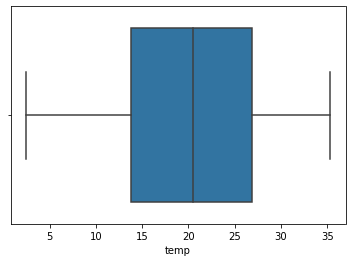

In [381]:
sns.boxplot(bikedata["temp"])

### -tempfeels     

<AxesSubplot:xlabel='tempfeels'>

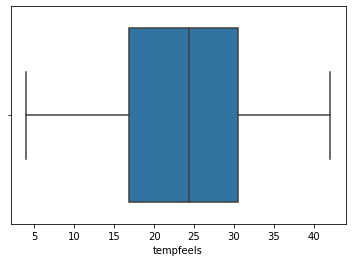

In [382]:
sns.boxplot(bikedata["tempfeels"])

### -humidity   

<AxesSubplot:xlabel='humidity'>

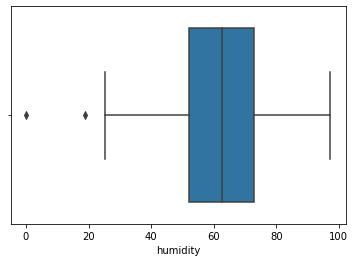

In [383]:
sns.boxplot(bikedata["humidity"])

### -humidity distplot shows outliers
### -treating outliers 

In [384]:

thresholds=outlierthreshold('humidity')
humidity_upper=thresholds["upper"]
humidity_lower=thresholds["lower"]

percentage_removed=len(bikedata[bikedata['humidity']>humidity_upper])/len(bike)*100
print(round(percentage_removed,2), "% data has humidity greater than the upper threshold", humidity_upper)
percentage_removed_lower=len(bikedata[bikedata['humidity']<humidity_lower])/len(bikedata)*100
print(round(percentage_removed_lower,2), "% data has humidity lesser than the lower threshold", humidity_lower)
bikedata=bikedata[(bikedata['humidity'] > humidity_lower) & (bikedata['humidity'] < humidity_upper)]
print("Shape after removing")
bikedata.shape

0.0 % data has humidity greater than the upper threshold 104.4739375
0.27 % data has humidity lesser than the lower threshold 20.515637499999997
Shape after removing


(728, 11)

### -after humidity outlier treatment

<AxesSubplot:xlabel='humidity'>

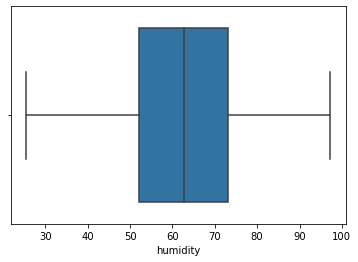

In [385]:
sns.boxplot(bikedata["humidity"])

### -windspeed

<AxesSubplot:xlabel='windspeed'>

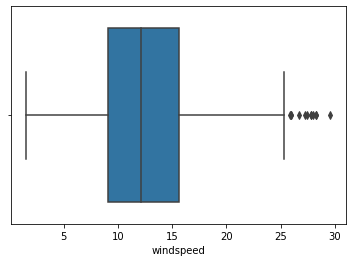

In [386]:
sns.boxplot(bikedata["windspeed"])

### -windspeed distplot shows outliers
### -treating outliers 

In [389]:

thresholds=outlierthreshold('windspeed')
windspeed_upper=thresholds["upper"]
windspeed_lower=thresholds["lower"]

percentage_removed=len(bikedata[bikedata['windspeed']>windspeed_upper])/len(bike)*100
print(round(percentage_removed,2), "% data has windspeed greater than the upper threshold", windspeed_upper)
percentage_removed_lower=len(bikedata[bikedata['windspeed']<windspeed_lower])/len(bikedata)*100
print(round(percentage_removed_lower,2), "% data has windspeed lesser than the lower threshold", windspeed_lower)
bikedata=bikedata[(bikedata['windspeed'] > windspeed_lower) & (bikedata['windspeed'] < windspeed_upper)]
print("Shape after removing")
bikedata.shape

0.0 % data has windspeed greater than the upper threshold 25.1014495
0.0 % data has windspeed lesser than the lower threshold -0.7259784999999983
Shape after removing


(713, 11)

### -after humidity outlier treatment

<AxesSubplot:xlabel='windspeed'>

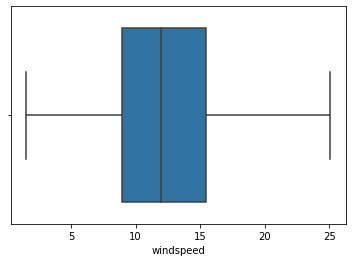

In [390]:
sns.boxplot(bikedata["windspeed"])

## Step 5 Univariate and Multivariate analysis to get some insights 

0    692
1     21
Name: holiday, dtype: int64


<AxesSubplot:ylabel='holiday'>

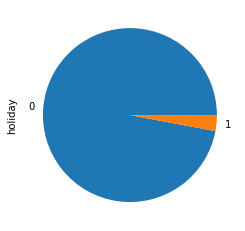

In [391]:
print(bikedata["holiday"].value_counts())
bikedata["holiday"].value_counts().plot(kind='pie')

1    451
2    242
3     20
Name: weathersit, dtype: int64


<AxesSubplot:ylabel='weathersit'>

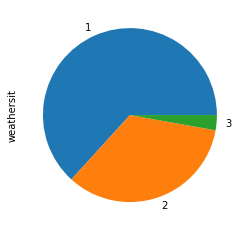

In [392]:
print(bikedata["weathersit"].value_counts())
bikedata["weathersit"].value_counts().plot(kind='pie')

### Renaming values in some columns to make it meaningful

In [393]:
### converting categorical columns to meaningful values
bikedata['season'].replace({1:"spring",2:"summer",3:"fall",4:"winter"},inplace=True)
bikedata['weathersit'].replace({1:'Clear',2:'Misty or Cloudy',3:'Light Snow or Rain',4:'Heavy Snow or Rain'}, inplace=True)


In [394]:
### By calendar 01-01-2018 was a Monday
bikedata['weekday'].replace({6:"Mon",0:"Tue",1:"Wed",2:"Thur",3:"Fri",4:"Sat",5:"Sun"},inplace=True)
bikedata['mnth'].replace({1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"June",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"},inplace=True)

In [395]:
bikedata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      713 non-null    object 
 1   yr          713 non-null    int64  
 2   mnth        713 non-null    object 
 3   holiday     713 non-null    int64  
 4   weekday     713 non-null    object 
 5   weathersit  713 non-null    object 
 6   temp        713 non-null    float64
 7   tempfeels   713 non-null    float64
 8   humidity    713 non-null    float64
 9   windspeed   713 non-null    float64
 10  cnt         713 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 66.8+ KB


### Plotting count of rentals with every categorical variable

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

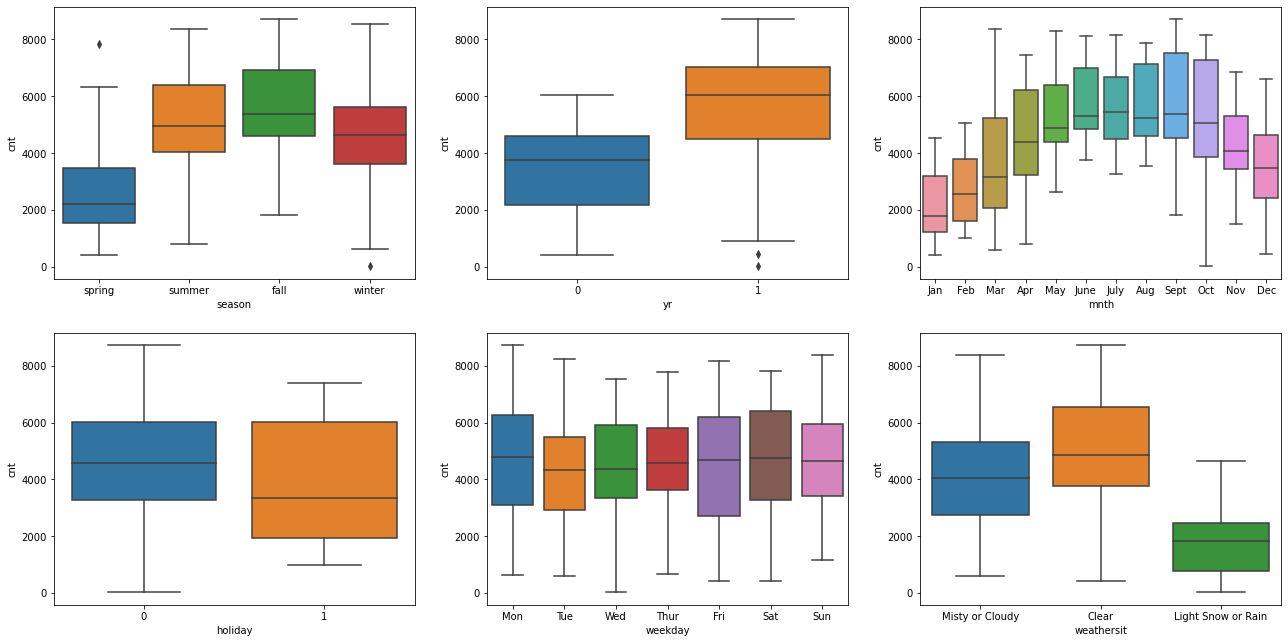

In [396]:
plt.figure(figsize=(22,17))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=bikedata)
plt.subplot(3,3,2)
sns.boxplot(x='yr',y='cnt',data=bikedata)
plt.subplot(3,3,3)
sns.boxplot(x='mnth',y='cnt',data=bikedata)
plt.subplot(3,3,4)
sns.boxplot(x='holiday',y='cnt',data=bikedata)
plt.subplot(3,3,5)
sns.boxplot(x='weekday',y='cnt',data=bikedata)
plt.subplot(3,3,6)
sns.boxplot(x='weathersit',y='cnt',data=bikedata)




1. The count of rentals is highest in fall season, very low in spring
2. The count of rentals is increasing with year, considerably high for 2019
3. Rentals are higher in the mid months, and lower in start and end of year
4. The count is very low when there is Light Snow/Rain, quite high when it is clear, so weather plays an important role 


<AxesSubplot:xlabel='humidity', ylabel='Density'>

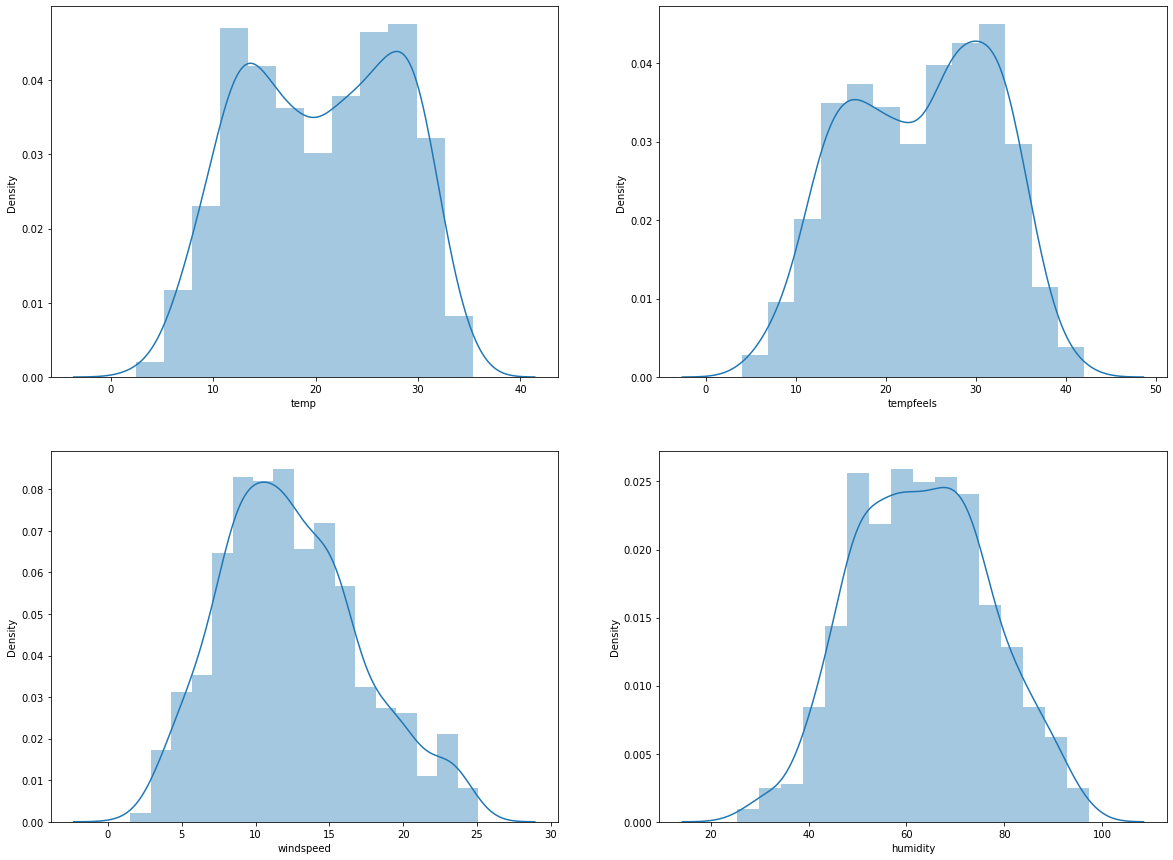

In [397]:
plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
sns.distplot(bikedata['temp'])
plt.subplot(2,2,2)
sns.distplot(bikedata['tempfeels'])
plt.subplot(2,2,3)
sns.distplot(bikedata['windspeed'])
plt.subplot(2,2,4)
sns.distplot(bikedata['humidity'])

season
fall      1060014
spring     442792
summer     908121
winter     830682
Name: cnt, dtype: int64

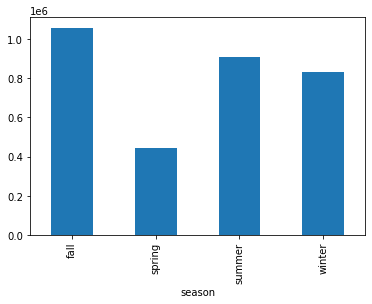

In [398]:
bikedata.groupby('season').cnt.sum().plot(kind="bar")
bikedata.groupby('season').cnt.sum()

weathersit
Clear                 2221277
Light Snow or Rain      37246
Misty or Cloudy        983086
Name: cnt, dtype: int64

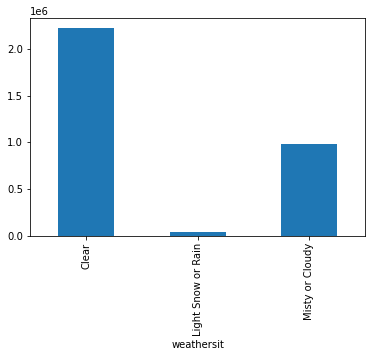

In [399]:
bikedata.groupby('weathersit').cnt.sum().plot(kind="bar")
bikedata.groupby('weathersit').cnt.sum()

yr
0    1228712
1    2012897
Name: cnt, dtype: int64

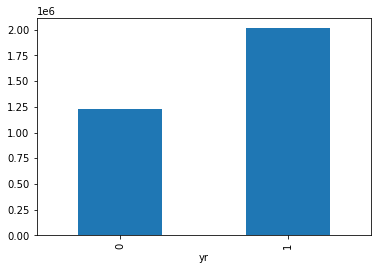

In [400]:
bikedata.groupby('yr').cnt.sum().plot(kind="bar")
bikedata.groupby('yr').cnt.sum()

holiday
1      78435
0    3163174
Name: cnt, dtype: int64

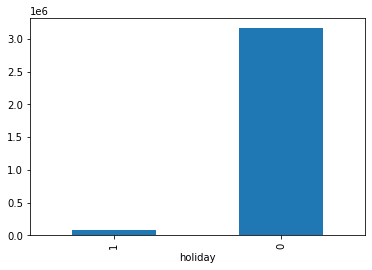

In [401]:
bikedata.groupby('holiday').cnt.sum().sort_values().plot(kind="bar")
bikedata.groupby('holiday').cnt.sum().sort_values()

weekday
Tue     438039
Wed     444917
Thur    467314
Fri     467838
Mon     468299
Sat     475195
Sun     480007
Name: cnt, dtype: int64

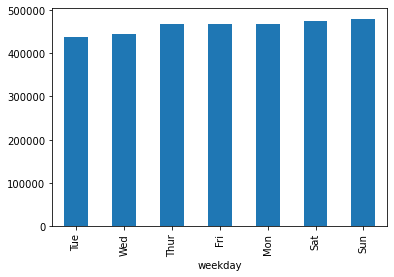

In [402]:
bikedata.groupby('weekday').cnt.sum().sort_values().plot(kind="bar")
bikedata.groupby('weekday').cnt.sum().sort_values()

mnth
Jan     128343
Feb     141709
Dec     209287
Mar     212788
Nov     252554
Apr     264184
Oct     313698
May     331686
July    344948
Sept    345991
June    346342
Aug     350079
Name: cnt, dtype: int64

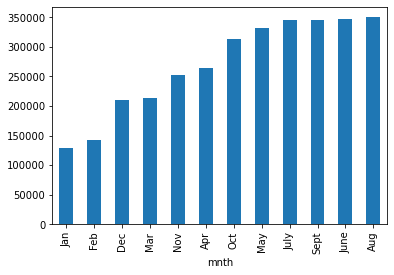

In [403]:

bikedata.groupby('mnth').cnt.sum().sort_values().plot(kind="bar")
bikedata.groupby('mnth').cnt.sum().sort_values()

### Summary from the above analysis:

1. The count of rentals is highest in fall season, very low in spring
2. The count of rentals is increasing with year, considerably high for 2019
3. Rentals are higher in the mid months, and lower in start and end of year
4. The count is very low when there is Light Snow/Rain, quite high when it is clear, so weather plays an important role 
5. Midweeks have lower count than weekends and extended weekends

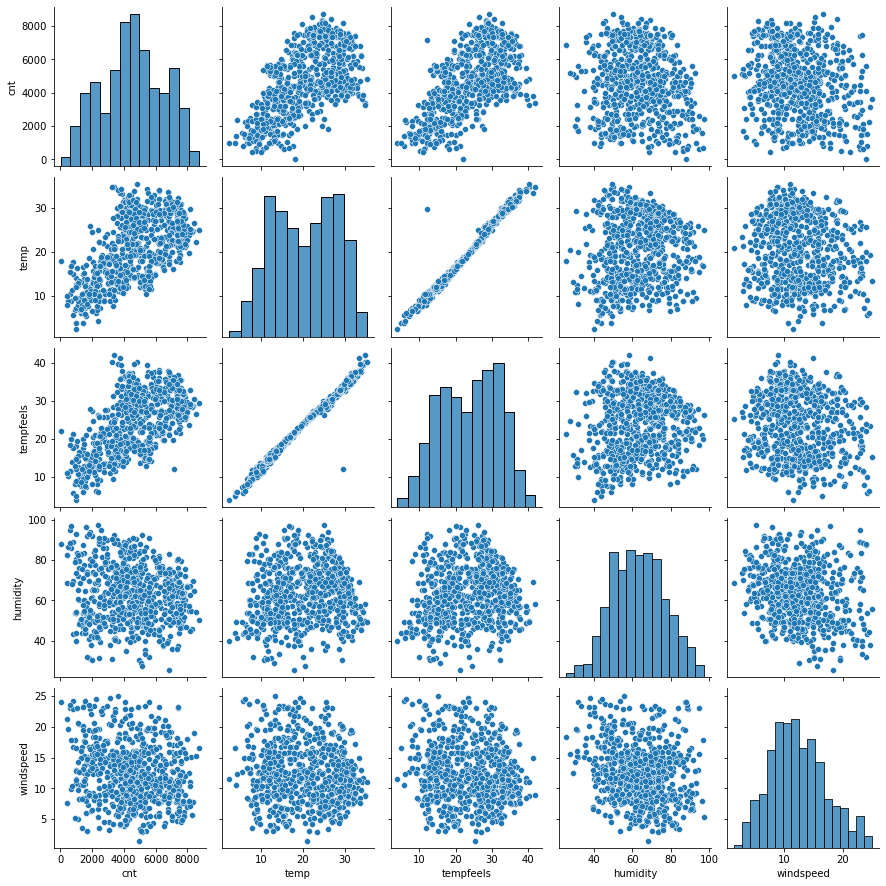

In [404]:
### pairplot to check if linear regression is a fit
sns.pairplot(bikedata, vars=['cnt','temp','tempfeels','humidity','windspeed'])
plt.show()

### temp, tempfeels show a very linear trend,  linear regression will be a good fit

## Step 6-- Data Preparation for linear regression

### Converting categorical to numeric columns

In [405]:
season=pd.get_dummies(bikedata['season'],drop_first=True)
bikedata=pd.concat([bikedata,season],axis=1)
bikedata=bikedata.drop('season',axis=1)

weathersit=pd.get_dummies(bikedata['weathersit'],drop_first=True)
bikedata=pd.concat([bikedata,weathersit],axis=1)
bikedata=bikedata.drop('weathersit',axis=1)
bikedata.head(5)

month=pd.get_dummies(bikedata['mnth'],drop_first=True)
bikedata=pd.concat([bikedata,month],axis=1)
bikedata=bikedata.drop('mnth',axis=1)
bikedata.head(5)

weekday=pd.get_dummies(bikedata['weekday'],drop_first=True)
bikedata=pd.concat([bikedata,weekday],axis=1)
bikedata=bikedata.drop('weekday',axis=1)
bikedata.head(5)


,yr,holiday,temp,tempfeels,humidity,windspeed,cnt,spring,summer,winter,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed
0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


[Text(0.5, 1.0, 'Coorelation between numeric variables')]

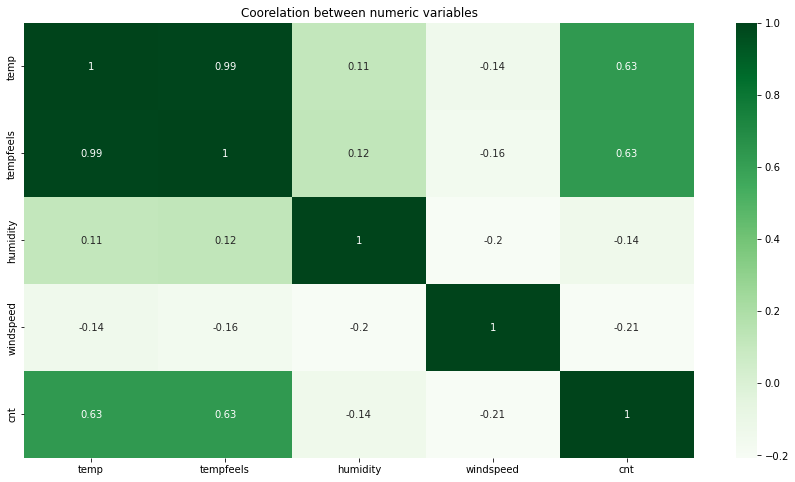

In [406]:
plt.figure(figsize=(15,8))
sns.heatmap(bikedata[["temp","tempfeels","humidity","windspeed","cnt"]].corr(),annot=True,cmap="Greens").set(title='Coorelation between numeric variables')

### temp and tempfeels have a very high coorelation, Removing tempfeels

In [407]:
bikedata=bikedata.drop(axis=1,  columns=["tempfeels"])

In [408]:
df_train,df_test=train_test_split(bikedata, train_size=0.7,random_state=1)
scaler=MinMaxScaler()
num_vars=['temp','humidity','windspeed','cnt']
df_train[num_vars]
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head(10)

,yr,holiday,temp,humidity,windspeed,cnt,spring,summer,winter,Light Snow or Rain,...,May,Nov,Oct,Sept,Mon,Sat,Sun,Thur,Tue,Wed
568,1,0,0.850474,0.612761,0.301517,0.798896,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
521,1,0,0.616840,0.487050,0.108936,0.809135,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
353,0,0,0.407087,0.463046,0.060275,0.428900,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
165,0,0,0.707178,0.275427,0.392959,0.593419,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
477,1,0,0.327133,0.722679,0.817129,0.367234,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
445,1,0,0.616840,0.820594,0.235441,0.787966,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
308,0,0,0.333364,0.347442,0.459126,0.449149,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
605,1,0,0.779864,0.397347,0.219799,0.882996,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108,0,0,0.556613,0.569804,0.361859,0.366084,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
469,1,0,0.682257,0.330386,0.571961,0.817994,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


## Step 7 -- Linear regression using statsmodel

### Model 1

In [409]:
y_train=df_train.pop('cnt')
X_train=df_train
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     98.84
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          4.71e-175
Time:                        19:18:26   Log-Likelihood:                 527.81
No. Observations:                 499   AIC:                            -999.6
Df Residuals:                     471   BIC:                            -881.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3375      0.043      7.825      0.000       0.253       0.422
yr                     0.2361      0.008     29.303      0.000       0.220       0.252
holiday               -0.0753      0.024     -3.110      0.002      -0.123      -0.028
temp                   0.3730      0.047      7.931      0.000       0.281       0.465
humidity              -0.1028      0.029     -3.599      0.000      -0.159      -0.047
windspeed             -0.0848      0.020     -4.315      0.000      -0.123      -0.046
spring                -0.0828      0.031     -2.701      0.007      -0.143      -0.023
summer                 0.0014      0.026      0.056      0.956      -0.049       0.052
winter                 0.0777      0.028      2.799      0.005       0.023       0.132
Light Snow or Rain    -0.2375      0.028     -8.577      0.000      -0.292      -0.183
Misty or Cloudy       -0.0527      0.011     -4.892      0.000      -0.074      -0.032
Aug                    0.0165      0.033      0.495      0.621      -0.049       0.082
Dec                   -0.0583      0.035     -1.679      0.094      -0.127       0.010
Feb                   -0.0528      0.035     -1.510      0.132      -0.121       0.016
Jan                   -0.0724      0.036     -1.993      0.047      -0.144      -0.001
July                  -0.0344      0.034     -1.006      0.315      -0.102       0.033
June                   0.0323      0.023      1.384      0.167      -0.014       0.078
Mar                   -0.0017      0.027     -0.062      0.951      -0.055       0.052
May                    0.0398      0.020      1.944      0.052      -0.000       0.080
Nov                   -0.0548      0.037     -1.493      0.136      -0.127       0.017
Oct                    0.0243      0.036      0.673      0.501      -0.047       0.095
Sept                   0.0737      0.032      2.336      0.020       0.012       0.136
Mon                    0.0055      0.015      0.372      0.710      -0.024       0.035
Sat                   -0.0073      0.015     -0.500      0.618      -0.036       0.021
Sun                   -0.0032      0.016     -0.204      0.839      -0.034       0.028
Thur                  -0.0096      0.015     -0.652      0.515      -0.039       0.019
Tue                   -0.0431      0.015     -2.922      0.004      -0.072      -0.014
Wed                   -0.0259      0.015     -1.715      0.087      -0.056       0.004
==============================================================================
Omnibus:                       66.426   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.464
Skew:                          -0.646   Prob(JB):                     8.79e-41
Kurtosis:                       5.684   Cond. No.                     

### Since there are 28 features, RFE makes more sense followed by MFE

In [410]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm)
rfe = rfe.fit(X_train, y_train)

In [221]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 14),
 ('winter', False, 3),
 ('Light Snow or Rain', True, 1),
 ('Misty or Cloudy', True, 1),
 ('Aug', False, 12),
 ('Dec', False, 5),
 ('Feb', False, 8),
 ('Jan', False, 4),
 ('July', True, 1),
 ('June', False, 11),
 ('Mar', True, 1),
 ('May', True, 1),
 ('Nov', False, 6),
 ('Oct', True, 1),
 ('Sept', True, 1),
 ('Mon', False, 7),
 ('Sat', False, 13),
 ('Sun', False, 15),
 ('Thur', False, 10),
 ('Tue', False, 2),
 ('Wed', False, 9)]

In [411]:
independentvars=X_train.columns[rfe.support_]
independentvars


Index(['yr', 'holiday', 'temp', 'humidity', 'windspeed', 'spring', 'winter',
       'Light Snow or Rain', 'Dec', 'Feb', 'Jan', 'July', 'Nov'],
      dtype='object')

### We have 13 columns remaining using RFE

### Model2

In [412]:
X_train=df_train[independentvars]
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     185.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.85e-179
Time:                        19:18:49   Log-Likelihood:                 500.74
No. Observations:                 499   AIC:                            -973.5
Df Residuals:                     485   BIC:                            -914.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.3346      0.029     11.452      0.000       0.277       0.392
yr                     0.2291      0.008     27.962      0.000       0.213       0.245
holiday               -0.0711      0.024     -2.993      0.003      -0.118      -0.024
temp                   0.4511      0.035     13.038      0.000       0.383       0.519
humidity              -0.1758      0.023     -7.668      0.000      -0.221      -0.131
windspeed             -0.1042      0.020     -5.217      0.000      -0.143      -0.065
spring                -0.0856      0.019     -4.506      0.000      -0.123      -0.048
winter                 0.0855      0.014      6.069      0.000       0.058       0.113
Light Snow or Rain    -0.1788      0.026     -6.857      0.000      -0.230      -0.128
Dec                   -0.0739      0.019     -3.896      0.000      -0.111      -0.037
Feb                   -0.0557      0.023     -2.456      0.014      -0.100      -0.011
Jan                   -0.0724      0.023     -3.083      0.002      -0.119      -0.026
July                  -0.0776      0.016     -4.834      0.000      -0.109      -0.046
Nov                   -0.0719      0.018     -3.892      0.000      -0.108      -0.036
==============================================================================
Omnibus:                       54.994   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              115.290
Skew:                          -0.624   Prob(JB):                     9.23e-26
Kurtosis:                       4.997   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p values are within the range <0.05 hence we will look at VIF

### Calculating VIF to detect multicollinearity

In [413]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,10.70
3,humidity,8.50
4,windspeed,4.32
5,spring,4.28
6,winter,2.69
10,Jan,2.32
9,Feb,2.24
0,yr,1.94
12,Nov,1.84
8,Dec,1.60


### dropping humidity as the VIF is very high 
### Acceptible range <5

In [414]:

independentvars

independentvars = independentvars.drop('humidity')
independentvars

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter',
       'Light Snow or Rain', 'Dec', 'Feb', 'Jan', 'July', 'Nov'],
      dtype='object')

### Model 3

In [415]:
X_train=df_train[independentvars]
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          5.69e-168
Time:                        19:18:54   Log-Likelihood:                 472.20
No. Observations:                 499   AIC:                            -918.4
Df Residuals:                     486   BIC:                            -863.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2485      0.029      8.709      0.000       0.192       0.305
yr                     0.2377      0.009     27.703      0.000       0.221       0.255
holiday               -0.0684      0.025     -2.721      0.007      -0.118      -0.019
temp                   0.4113      0.036     11.365      0.000       0.340       0.482
windspeed             -0.0669      0.020     -3.266      0.001      -0.107      -0.027
spring                -0.0867      0.020     -4.318      0.000      -0.126      -0.047
winter                 0.0750      0.015      5.056      0.000       0.046       0.104
Light Snow or Rain    -0.2551      0.026    -10.001      0.000      -0.305      -0.205
Dec                   -0.0828      0.020     -4.134      0.000      -0.122      -0.043
Feb                   -0.0504      0.024     -2.104      0.036      -0.098      -0.003
Jan                   -0.0704      0.025     -2.832      0.005      -0.119      -0.022
July                  -0.0541      0.017     -3.247      0.001      -0.087      -0.021
Nov                   -0.0697      0.020     -3.569      0.000      -0.108      -0.031
==============================================================================
Omnibus:                       54.818   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.191
Skew:                          -0.676   Prob(JB):                     4.77e-22
Kurtosis:                       4.701   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p value of May is high >0.05, hence we will drop it, as it is insignificant

In [416]:
independentvars
independentvars = independentvars.drop('May')
independentvars

KeyError: "['May'] not found in axis"

### Model 4

In [417]:
X_train=df_train[independentvars]
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          5.69e-168
Time:                        19:18:55   Log-Likelihood:                 472.20
No. Observations:                 499   AIC:                            -918.4
Df Residuals:                     486   BIC:                            -863.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2485      0.029      8.709      0.000       0.192       0.305
yr                     0.2377      0.009     27.703      0.000       0.221       0.255
holiday               -0.0684      0.025     -2.721      0.007      -0.118      -0.019
temp                   0.4113      0.036     11.365      0.000       0.340       0.482
windspeed             -0.0669      0.020     -3.266      0.001      -0.107      -0.027
spring                -0.0867      0.020     -4.318      0.000      -0.126      -0.047
winter                 0.0750      0.015      5.056      0.000       0.046       0.104
Light Snow or Rain    -0.2551      0.026    -10.001      0.000      -0.305      -0.205
Dec                   -0.0828      0.020     -4.134      0.000      -0.122      -0.043
Feb                   -0.0504      0.024     -2.104      0.036      -0.098      -0.003
Jan                   -0.0704      0.025     -2.832      0.005      -0.119      -0.022
July                  -0.0541      0.017     -3.247      0.001      -0.087      -0.021
Nov                   -0.0697      0.020     -3.569      0.000      -0.108      -0.031
==============================================================================
Omnibus:                       54.818   Durbin-Watson:                   2.052
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               98.191
Skew:                          -0.676   Prob(JB):                     4.77e-22
Kurtosis:                       4.701   Cond. No.                         16.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The p values are within the range <0.05 hence we will look at VIF

In [418]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
2,temp,4.46
3,windspeed,4.30
4,spring,4.14
5,winter,2.50
9,Jan,2.29
8,Feb,2.23
0,yr,1.93
11,Nov,1.83
7,Dec,1.54
10,July,1.38


### the VIF of temp and windspeed is high,
### We observed that temp has a good linear trend with cnt, with existing domain knowledge, that may be an important feature, hence dropping windspeed to predict

In [419]:
independentvars
independentvars = independentvars.drop('windspeed')
independentvars

Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'Light Snow or Rain',
       'Dec', 'Feb', 'Jan', 'July', 'Nov'],
      dtype='object')

### Model 5

In [420]:
X_train=df_train[independentvars]
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.74e-167
Time:                        19:18:55   Log-Likelihood:                 466.78
No. Observations:                 499   AIC:                            -909.6
Df Residuals:                     487   BIC:                            -859.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2051      0.026      8.042      0.000       0.155       0.255
yr                     0.2379      0.009     27.447      0.000       0.221       0.255
holiday               -0.0686      0.025     -2.704      0.007      -0.118      -0.019
temp                   0.4318      0.036     11.999      0.000       0.361       0.503
spring                -0.0866      0.020     -4.270      0.000      -0.126      -0.047
winter                 0.0813      0.015      5.478      0.000       0.052       0.111
Light Snow or Rain    -0.2665      0.026    -10.449      0.000      -0.317      -0.216
Dec                   -0.0763      0.020     -3.789      0.000      -0.116      -0.037
Feb                   -0.0466      0.024     -1.927      0.055      -0.094       0.001
Jan                   -0.0634      0.025     -2.535      0.012      -0.113      -0.014
July                  -0.0533      0.017     -3.166      0.002      -0.086      -0.020
Nov                   -0.0693      0.020     -3.511      0.000      -0.108      -0.031
==============================================================================
Omnibus:                       55.590   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.305
Skew:                          -0.671   Prob(JB):                     3.69e-23
Kurtosis:                       4.780   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [421]:
independentvars
independentvars = independentvars.drop('Mar')
independentvars

KeyError: "['Mar'] not found in axis"

In [422]:
X_train=df_train[independentvars]
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm)
lr_model=lr.fit()
lr_model.params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.74e-167
Time:                        19:18:56   Log-Likelihood:                 466.78
No. Observations:                 499   AIC:                            -909.6
Df Residuals:                     487   BIC:                            -859.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2051      0.026      8.042      0.000       0.155       0.255
yr                     0.2379      0.009     27.447      0.000       0.221       0.255
holiday               -0.0686      0.025     -2.704      0.007      -0.118      -0.019
temp                   0.4318      0.036     11.999      0.000       0.361       0.503
spring                -0.0866      0.020     -4.270      0.000      -0.126      -0.047
winter                 0.0813      0.015      5.478      0.000       0.052       0.111
Light Snow or Rain    -0.2665      0.026    -10.449      0.000      -0.317      -0.216
Dec                   -0.0763      0.020     -3.789      0.000      -0.116      -0.037
Feb                   -0.0466      0.024     -1.927      0.055      -0.094       0.001
Jan                   -0.0634      0.025     -2.535      0.012      -0.113      -0.014
July                  -0.0533      0.017     -3.166      0.002      -0.086      -0.020
Nov                   -0.0693      0.020     -3.511      0.000      -0.108      -0.031
==============================================================================
Omnibus:                       55.590   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.305
Skew:                          -0.671   Prob(JB):                     3.69e-23
Kurtosis:                       4.780   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### No feature with p value>0.05

[Text(0.5, 1.0, 'Coorelation between numeric variables')]

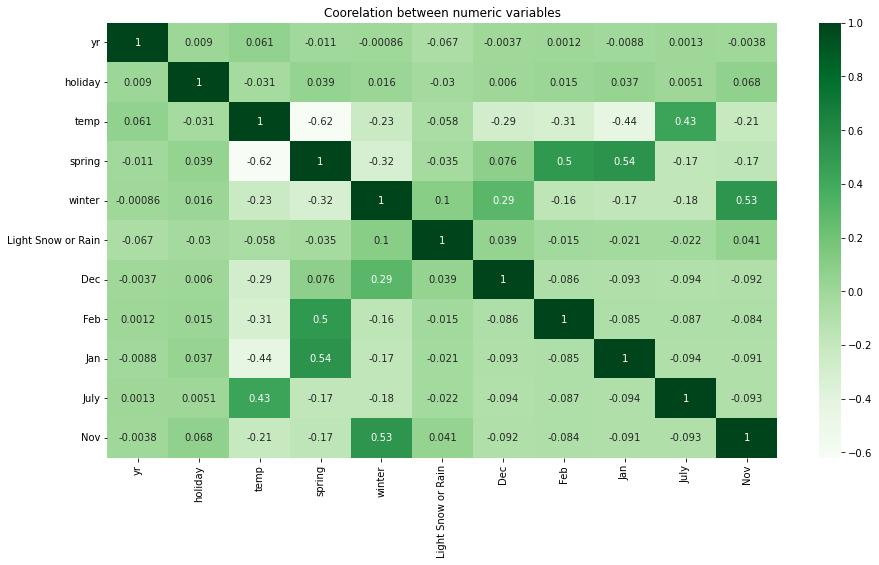

In [423]:
plt.figure(figsize=(15,8))
sns.heatmap(bikedata[independentvars].corr(),annot=True,cmap="Greens").set(title='Coorelation between numeric variables')

### Checking VIF if they are in acceptable range

In [424]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,spring,3.91
4,winter,2.49
2,temp,2.40
8,Jan,2.27
7,Feb,2.22
0,yr,1.92
10,Nov,1.80
6,Dec,1.53
9,July,1.35
1,holiday,1.04


### We will conclude this to be the final model and continue with residual analysis

## Step8 -- Prediction and  Residual Analysis

Text(0.5, 6.79999999999999, 'Errors')

<Figure size 432x288 with 0 Axes>

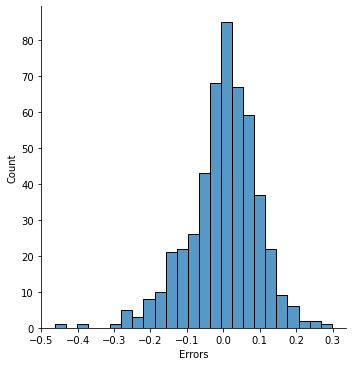

In [425]:
### histogram - error terms

fig = plt.figure()
y_train_pred=lr_model.predict(X_train_sm)
res=y_train-y_train_pred
sns.displot(res, bins=25)              
plt.xlabel('Errors', fontsize = 10)  





### Mean of residuals is zero

In [426]:
round((y_train-y_train_pred).mean(),2)

-0.0

In [427]:
y_train_pred

568    0.756963
521    0.709377
353    0.385996
165    0.510509
477    0.584278
         ...   
149    0.499319
659    0.754835
75     0.310013
241    0.517235
37     0.186314
Length: 499, dtype: float64

### the errors are normally distributed around zero and this validates the assumption of linear regression

Text(0.5, 1.0, 'Normal Q-Q Plot')

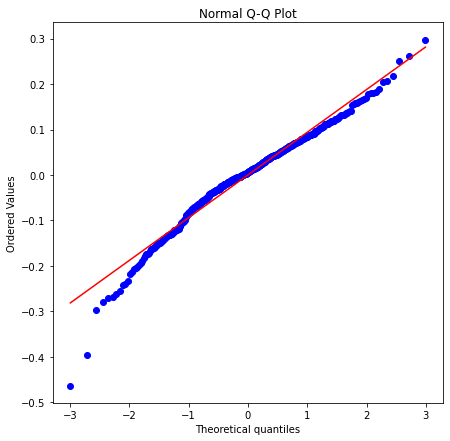

In [428]:
# Plotting Q-Q plot to confirm normal distribution of errors
plt.figure(figsize=(7,7))
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")

## Step 9-- Evaluation of  the model on test dataset 

In [429]:
num_vars=['temp','humidity','windspeed','cnt']
df_test[num_vars]
df_test[num_vars]=scaler.transform(df_test[num_vars])

In [430]:
y_test = df_test.pop('cnt')
X_test = df_test


In [431]:
X_test = df_test[X_train.columns]

In [432]:
# Adding a constant variable 
X_test_sm = sm.add_constant(X_test)

y_test_pred = lr_model.predict(X_test_sm)

In [433]:
r2_test=r2_score(y_true=y_test,y_pred=y_test_pred)
r2_test

0.7987501213117623

### R2 on test dataset

### This validates the assumption of normal distribution of error terms

Text(0.5, 6.79999999999999, 'Errors')

<Figure size 432x288 with 0 Axes>

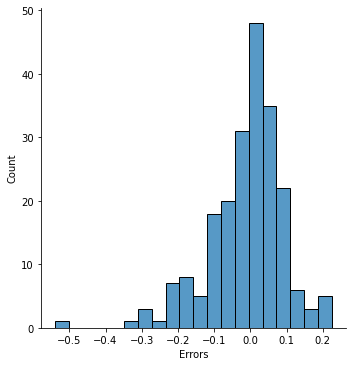

In [434]:
### histogram - error terms
fig = plt.figure()
res=y_test-y_test_pred
sns.displot(res)
fig.suptitle('Error Terms', fontsize = 10)                  
plt.xlabel('Errors', fontsize = 10)  

### This validates the assumption of linear relation between actual and predicted values
### This also validates the	Homoscedasticity of Residuals, as there is no pattern on residuals

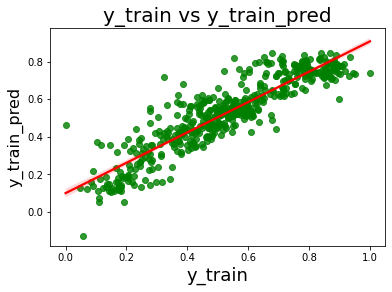

In [435]:
# Visualizing the fit on the test data

plt.figure()
sns.regplot(x=y_train, y=y_train_pred, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_train vs y_train_pred', fontsize=20)
plt.xlabel('y_train', fontsize=18)
plt.ylabel('y_train_pred', fontsize=16)
plt.show()


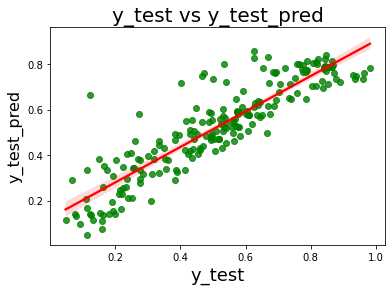

In [436]:
# Visualizing the fit on the test data

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, fit_reg=True,scatter_kws={"color": "green"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()


## Step -10 Summary and Model explaination

In [437]:
### Model Summary
lr_model.summary()
## R2 and Adjusted R2 >80%

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     186.8
Date:                Mon, 13 Jun 2022   Prob (F-statistic):          7.74e-167
Time:                        19:19:00   Log-Likelihood:                 466.78
No. Observations:                 499   AIC:                            -909.6
Df Residuals:                     487   BIC:                            -859.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.2051      0.026      8.042      0.000       0.155       0.255
yr                     0.2379      0.009     27.447      0.000       0.221       0.255
holiday               -0.0686      0.025     -2.704      0.007      -0.118      -0.019
temp                   0.4318      0.036     11.999      0.000       0.361       0.503
spring                -0.0866      0.020     -4.270      0.000      -0.126      -0.047
winter                 0.0813      0.015      5.478      0.000       0.052       0.111
Light Snow or Rain    -0.2665      0.026    -10.449      0.000      -0.317      -0.216
Dec                   -0.0763      0.020     -3.789      0.000      -0.116      -0.037
Feb                   -0.0466      0.024     -1.927      0.055      -0.094       0.001
Jan                   -0.0634      0.025     -2.535      0.012      -0.113      -0.014
July                  -0.0533      0.017     -3.166      0.002      -0.086      -0.020
Nov                   -0.0693      0.020     -3.511      0.000      -0.108      -0.031
==============================================================================
Omnibus:                       55.590   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              103.305
Skew:                          -0.671   Prob(JB):                     3.69e-23
Kurtosis:                       4.780   Cond. No.                         14.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### VIF lower than 5 hence no multi collinearity, Linear regression assumption is validated

In [438]:
vif=pd.DataFrame()
vif['Features']=X_train.columns
vif['VIF']=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
3,spring,3.91
4,winter,2.49
2,temp,2.40
8,Jan,2.27
7,Feb,2.22
0,yr,1.92
10,Nov,1.80
6,Dec,1.53
9,July,1.35
1,holiday,1.04


### R2 of train and test model is almost same, this validates the linear regression assumption

In [439]:
# Calculating Adjusted-R^2 value for the test dataset
r2=r2_test
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print("R2 on test dataset is:",round(r2,4)) 
print("Adjusted R2 on test dataset is:",adjusted_r2) 

R2 on test dataset is: 0.7988
Adjusted R2 on test dataset is: 0.7878


In [440]:
# calculate the mean squared error of train and test data
mse_traindata = mean_squared_error(y_train, y_train_pred)
mse_testdata = mean_squared_error(y_test, y_test_pred)
print('MSE on Train dataset is: ', mse_traindata)
print('MSE on Test dataset is: ', mse_testdata)

MSE on Train dataset is:  0.009016082033365737
MSE on Test dataset is:  0.010894433129802783


In [441]:
### final list of independent variables
independentvars

Index(['yr', 'holiday', 'temp', 'spring', 'winter', 'Light Snow or Rain',
       'Dec', 'Feb', 'Jan', 'July', 'Nov'],
      dtype='object')



### cnt = 0.2602 + 0.2371 x yr - 0.0916 x holiday + 0.3728 x temp - 0.1583 x spring - 0.3023 x Light Snow or Rain - 0.0745 x Misty or Cloudy - 0.0534 x July + 0.0394 x Mar + 0.0660 x Oct +  0.0608 X Sept

The features that positively impact the count of rentals
- Year
- Temp
- month of March
- month of Oct
- month of Sept


The features that negatively impact the count of rentals
- Holiday
- Spring
- Light Snow or Rain
- Misty or Cloudy
- month of July



As the year increses, the demand is definitely set to increases


81% of the variation of total rentals in training dataset and 84% in test dataset can be explained by the selected features, hence the model accuracy is considered acceptable.

Inputs to the company:

1. The company requires to check on new ways of expansion in the month of July and during spring and holidays, introducting new offers may be an option
2. The weather has a big impact on sales, weather specific care/accessories may help 
3. The situation after Covid may help as the number is seem to be increasing every year

